In [1]:
# 後ほどグラフを描画するために使います
# 先に実行しておいて下さい

%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# 3. Machine Learning with Python

機械学習を理論から理解して使いこなすには2時間では収まらない時間が必要です．  
なので，ここでは割りきって「とにかく使ってみる」「雰囲気を知る」を目標に，Python の `scikit-learn` という機械学習用ライブラリにフォーカスしながら機械学習の一連の流れを体験していきます．  
※意：細かい説明はしません．また説明は正確ではないです．

いきなり手書き数字のデータを扱うのはちょっと難易度が高いので，もっと簡単なデータを使って機械学習の大雑把な流れを把握していきます．

## 正解データを利用して未知データを予測・分類する問題

今回は，正解が分かっているデータを利用して，未知のデータを予測→分類する問題に取り組みます．  
「正解が分かっているデータを利用して，未知のデータを予測→分類する問題」とはどのような問題でしょうか？  
以下に例を挙げてみます．

- 身長 / 体重 / 性別のデータを利用して，新たに与えられた身長 / 体重の組み合わせから性別を予測→分類
- 気温や気圧およびそのときの天気のデータを利用して，新たに与えられた気温や気圧から天気を予測→分類

今回取り組む「手書きの数字を認識して何の数字が書かれているのか予測→分類」する問題も，はじめに大量の手書き数字とその手書き数字に対応する数字のデータが与えられます．そのデータを利用して，新たに与えられた手書き数字が何の数字に対応するのかを予測します．

ここで大事なのは，分類の規則の作り方です（e.g. 身長や体重のデータから性別を予測する規則を作る）  
正解が分かっているデータから分類の規則を作っていくことを__学習__とよびます．

ここで説明のために以下のような記号を使います

- train_set: 正解データ（学習に利用するデータ）
  - X: 予測に利用するデータ (e.g. 身長 / 体重)
  - y: 予測したい対象 (e.g. 性別)
  
`X` に対応する `y` から，学習を行って分類の規則を作ります．

どれだけ正しく分類規則が作れたか，評価するためのデータも用意しておきましょう．
  
- test_set: テストデータ（未知データ）
  - X_test: 予測に利用するデータ
  - y_test: 予測したい対象．分類結果が正しかったかどうか確認するために用いる（本来であれば分からない）
  
説明が長くなってしまいました．  
何やらぼんやりとしていて分かりにくいかもしれませんが，とにかくやってみましょう．

## 正解データとテストデータの用意

まず最初にデータを用意します．  
ここでは，データを用意する過程については説明しないので，何かやってる・・・位の理解で大丈夫です．  
以下を実行して下さい．

In [2]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_moons, make_classification
from sklearn.preprocessing import StandardScaler
import numpy as np

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
X, y = make_moons(noise=0.3, random_state=0)
X = StandardScaler().fit_transform(X)

X, X_test, y, y_test = train_test_split(X, y, test_size=.4)

上記の処理により，以下の4つのデータが作成されています．

- 正解データ
  - X: 予測に利用するデータ
  - y: 予測したい対象
- テストデータ
  - X_test: 予測に利用するデータ
  - y_test: 予測したい対象．分類結果が正しかったかどうか確認するために用いる
  
まずは学習に必要な正解データの中身を見ていきます．  
X，yのデータの大きさを確認しましょう（どちらも行列です）  

※詰まる方は1つ目のNotebookに戻っておさらいしましょう！

In [3]:
# Xのデータの大きさを確認
X.shape

(60, 2)

In [4]:
# yのデータの大きさを確認
y.shape

(60,)

Xとyの上から10行の中身を確認しましょう（列は全て表示）

In [5]:
# Xの上から10行の中身を確認（列は全て表示）
X[:10]

array([[-0.71978547,  1.72334673],
       [ 0.81773837,  1.64300265],
       [-0.42081847, -1.03126372],
       [-0.9843448 ,  1.29546509],
       [-0.31251963,  1.85361272],
       [ 0.4860189 ,  1.96041925],
       [-0.34408365, -0.11501714],
       [-0.85151619, -0.06022663],
       [ 0.11892081,  0.14210094],
       [-0.09130345, -0.93824346]])

In [6]:
# yの10行の中身を確認
y[:10]

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1])

これだけでもデータについて色々な情報が得られました．  
予測に利用するデータの種類は2種類で，各データは小数で表されています．これらのデータを利用して，結果が0であるか1であるかを予想するようです．

予測に利用するデータの種類が2種類しかない（＝2次元のデータな）ので，折角なのでデータの様子をグラフで描画して確認してみましょう．  
以下を実行して下さい．

/Users/amacbee/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


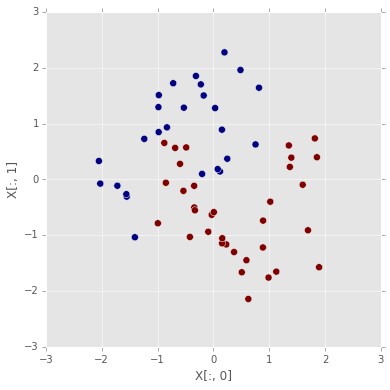

In [7]:
plt.figure(figsize=(6, 6))

plt.scatter(X[:, 0], X[:, 1], s=50, marker='o', c=y)  # 青: y=0，赤: y=1

plt.xlabel('X[:, 0]')
plt.ylabel('X[:, 1]')

青い点で示されるデータと赤い点で示されるデータを分類する規則を学習したいです．  
目で見ると何となく分け方が分かる気がしますね！

## データの分類規則を学習する

データの分類規則をどうやって学習するか？ここが機械学習の肝となる部分です．  
ですがそこを理解するためには最低限の数学の知識が必要となるため，このハンズオンではその点を説明しません．  
Pythonの `scikit-learn` というライブラリを使うと，知識がなくても何となくの分類規則なら学習することが出来ます．

※最適な分類規則を得るためには，パラメータ調整が必須です  
※くどいですが，現実世界の問題では何となく動かせるだけではどうしようもない

今回は `RBF SVM` という分類器を利用して，分類規則を学習します．  
以下を実行してみましょう．

In [8]:
from sklearn.svm import SVC

classifier = SVC(gamma=2, C=1)

使う分類器（およびパラメータ）を指定したら，`classifier.fit(X, y)` というコマンドを実行するだけで，分類規則を学習します．驚きの手軽さ！

In [9]:
classifier.fit(X, y)  # これを実行するだけで分類規則の学習は終了

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

分類性能を調べてみましょう．

`cal_z` は分類器の分類性能を計算してくれる関数です．  
中身の説明はしないので，とりあえず実行して次に進んで下さい．

In [10]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))

def cal_z(clf):
    if hasattr(clf, "decision_function"):
        z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        
    return z.reshape(xx.shape)

`cal_z` を利用して分類器の分類性能を図示してみます．  
以下を実行して下さい．

/Users/amacbee/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


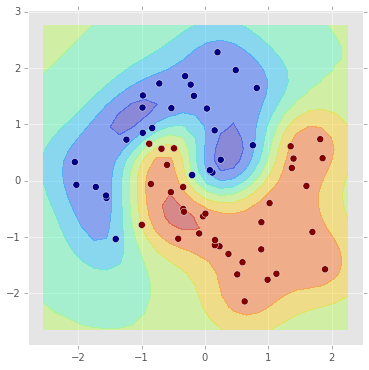

In [11]:
plt.figure(figsize=(6, 6))

plt.contourf(xx, yy, cal_z(classifier), alpha=.4)       # 分類器の分類性能をヒートマップ形式で表示
plt.scatter(X[:, 0], X[:, 1], s=50, marker='o', c=y)  # 正解データ点を表示

この分類器は，青い領域にあるデータを0，赤い領域にあるデータを1に分類します．  
色が濃いほど分類結果に自信があることを意味しています．

非常に高い精度で分類規則を学習出来ている気がしますね！  
ここに，分類を行いたいテストデータも追加して見てみましょう．  
以下を実行して下さい．

/Users/amacbee/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


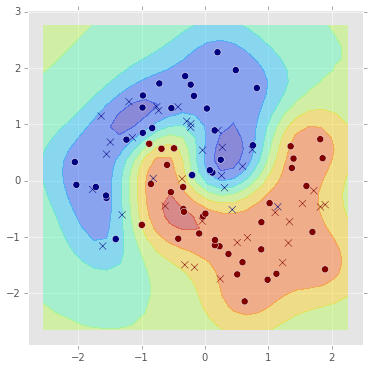

In [12]:
plt.figure(figsize=(6, 6))

plt.contourf(xx, yy, cal_z(classifier), alpha=.4)
plt.scatter(X[:, 0], X[:, 1], s=50, marker='o', c=y)
plt.scatter(X_test[:, 0], X_test[:, 1], s=50, marker='x', c=y_test)  # テストデータを表示する処理を追加

テストデータもうまく分類できそうです．

`classifier.score` を利用して，テストデータに対する分類の精度を数値で確認することもできます．  
以下を実行して下さい．

In [13]:
# テストデータに対する分類の正解率 [%]

100 * classifier.score(X_test, y_test)

92.5

ここまでが一連の手順です．  
今回の流れをもう一度おさらいすると，

- データの中身を確認
- 分類に利用する規則（アルゴリズム）を決定 / パラメータを決定　※今回あまり触れません
- classifier.fit(X, y) でデータをうまく分類する規則を学習
- 分類性能を確認
  - plt.contourf(xx, yy, cal_z(classifier), alpha=.4)  # 分類性能のヒートマップを表示
  - plt.scatter(X[:, 0], X[:, 1], s=50, marker='o', c=y)  # 分類規則を学習する際に利用するデータを表示
  - plt.scatter(X_test[:, 0], X_test[:, 1], s=50, marker='x', c=y_test)  # 分類を行いたいテストデータを表示
- classifier.score(X_test, y_test) でテストデータに対する分類性能を確認

利用するアルゴリズムはどう決定するの？パラメータはどうするの？クロスバリデーションやらないの？・・・etc.  
まだまだ考えることは山程ありますが，ここでは以上の説明にとどめておきます．

### 発展課題（時間があまりそうなら）

今回利用した `RBF SVM` の他にも様々な分類器があります．  
以下の分類器の中から一つ選んで，同じように分類規則を学習してみましょう．結果はどう変化しましたか？  
※ちゃんと動かしてないので問題あったら連絡下さい＼(^o^)／ｗ


- Nearest Neighbors

```python
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(3)
```

- Linear SVM

```python
from sklearn.svm import SVC
classifier = SVC(kernel="linear", C=0.025)
```

- Decision Tree

```python
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=5)
```

- Random Forest

```python
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
```

- AdaBoost

```python
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
```

- Naive Bayes

```python
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
```

- Linear Discriminant Analysis

```python
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
classifier = LinearDiscriminantAnalysis()
```

- Quadratic Discriminant Analysis

```python
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifier = QuadraticDiscriminantAnalysis()
```

In [14]:
# Random Forestを試してみます

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

In [15]:
# 分類規則を学習

classifier.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=1, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

/Users/amacbee/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


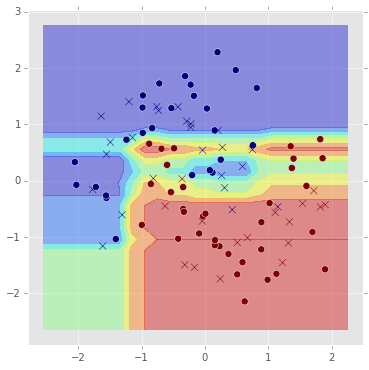

In [16]:
# 分類の性能を確認

plt.figure(figsize=(6, 6))

plt.contourf(xx, yy, cal_z(classifier), alpha=.4)  # 分類性能をヒートマップ形式で表示
plt.scatter(X[:, 0], X[:, 1], s=50, marker='o', c=y)  # 分類器の学習に利用したデータ (正解データ) を表示
plt.scatter(X_test[:, 0], X_test[:, 1], s=50, marker='x', c=y_test)  # テストデータを表示

In [17]:
# テストデータに対する分類の正解率 [%]

100 * classifier.score(X_test, y_test)

80.0